# NCI Weather Bench  - total_precipitation 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import dask.array as da
import glob
import matplotlib as mpl
import pprint 
import math
from random import random
from time import sleep
from multiprocessing.pool import Pool
import datetime

In [2]:
def hourly_rmse_a_year_single (y1, y2):
    rmse_list = []
    
    ds_wb  = xr.open_dataset( y1 )
    ds_NCI = xr.open_dataset( y2 ) 
    
    ds_wb  =  ds_wb[p_id]  
    ds_NCI =  ds_NCI[p_id] 
    
    date_times = ds_wb.time
    
    for dt in date_times:
        RMSE = -1.0
        try:
             RMSE = math.sqrt(  np.square(np.subtract(ds_wb.sel(time=dt) , ds_NCI.sel(time=dt))).mean() )
        except:
             RMSE = -0.1
        rmse_list.append(RMSE) 
        
    ds_wb.close()
    ds_NCI.close()    
    return rmse_list, date_times    


def hourly_rmse_multi_year_single (dir_wb, dir_NCI, p_name, p_id, year1, year2):

    all_years = []
    for year in range (year1, year2+1): 
        y1 = (dir_wb  + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        y2 = (dir_NCI + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        all_years.append ((y1,y2))             
       
    with Pool() as pool:                  
        rmse_list, date_times  = zip(* pool.starmap(hourly_rmse_a_year_single , all_years) )               
    #rmse_list, date_times =  hourly_rmse_a_year_single(all_years[0][0], all_years[0][1])       
    return rmse_list, date_times  
    
def display_hourly_rmse(time_list, err_list):  
    
    fig = plt.figure(figsize=(20, 8))
    grid = plt.GridSpec(5, 2, wspace=0.1, hspace=0.8)
    plt.subplot(grid[0:2, 0:1])
    plt.bar(time_list,  height = err_list, align='edge', width = 0.1, color='gray',label='RMSE' )
    plt.margins(x=0)
    #plt.xticks(time_list)
    plt.xlabel("Time")
    plt.ylabel("RMSE")
    plt.show()
    

In [3]:
%%time
NCI_dir = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg"
wb_dir  = "/g/data/wb00/admin/testing/weatherbench/5.625deg"
p_name = 'total_precipitation'
p_id   = 'tp'
year1 = 1979
year2 = 2018

#if __name__ == "__main__":
rmse_list, time_list = hourly_rmse_multi_year_single (wb_dir, NCI_dir, p_name, p_id, year1, year2)
print (type(rmse_list))
print (type(time_list))

<class 'tuple'>
<class 'tuple'>
CPU times: user 195 ms, sys: 342 ms, total: 537 ms
Wall time: 2min 17s


In [4]:
def display_hourly_rmse_double(time_list1, err_list1, time_list2, err_list2):  
    
    
    fig = plt.figure(figsize=(20, 8))
    grid = plt.GridSpec(8, 2, wspace=0.1, hspace=0.8)
    
    year = int(str(time_list1[0].values)[:4])
    plt.subplot(grid[0:2, 0:1])
    plt.bar(time_list1,  height = err_list1, align='edge', width = 0.1, color='gray',label='RMSE' )
    plt.margins(x=0)
    #plt.xticks(time_list)
    plt.xlabel("Date")
    plt.ylabel("RMSE")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title(year)
    plt.xlim([datetime.date(year, 1, 1), datetime.date(year+1, 1, 1)])
    
    year = int(str(time_list2[0].values)[:4])
    plt.subplot(grid[0:2, 1: ])
    plt.bar(time_list2,  height = err_list2, align='edge', width = 0.1, color='gray',label='RMSE' )
    plt.margins(x=0)
    #plt.xticks(time_list)
    plt.xlabel("Date")
    #plt.ylabel("RMSE")  
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title(year )
    plt.xlim([datetime.date(year, 1, 1), datetime.date(year+1, 1, 1)])
    
    plt.show()       

In [5]:
#print(  str(time_list[0][0].values)[:10] )

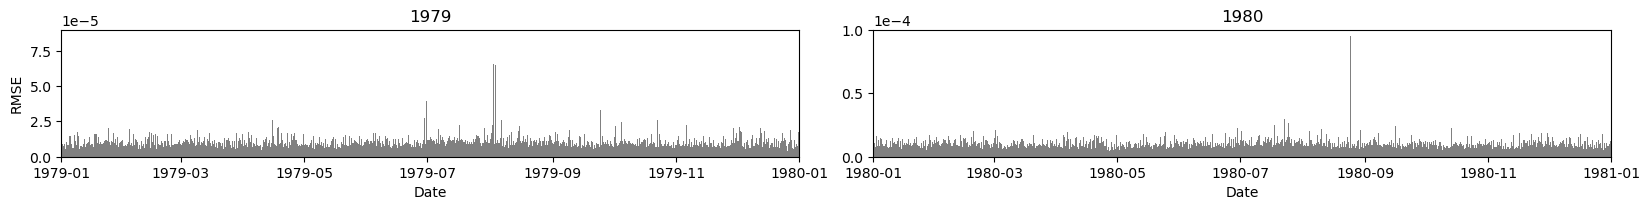

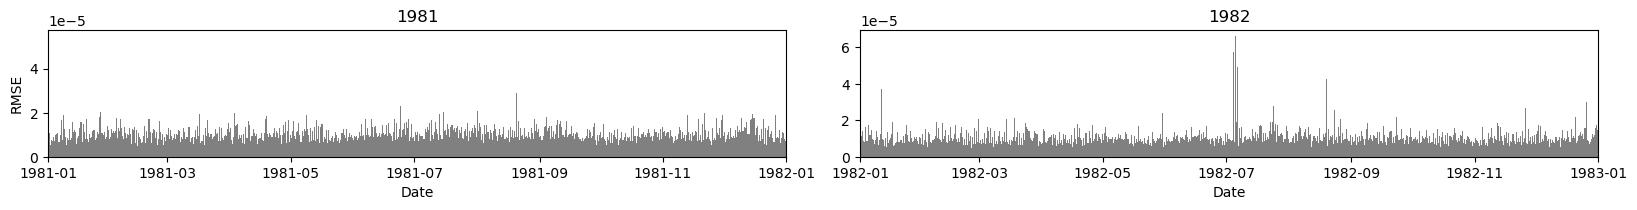

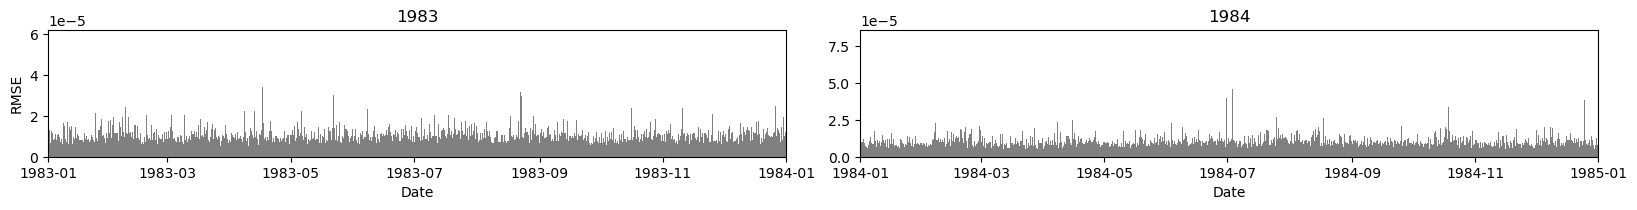

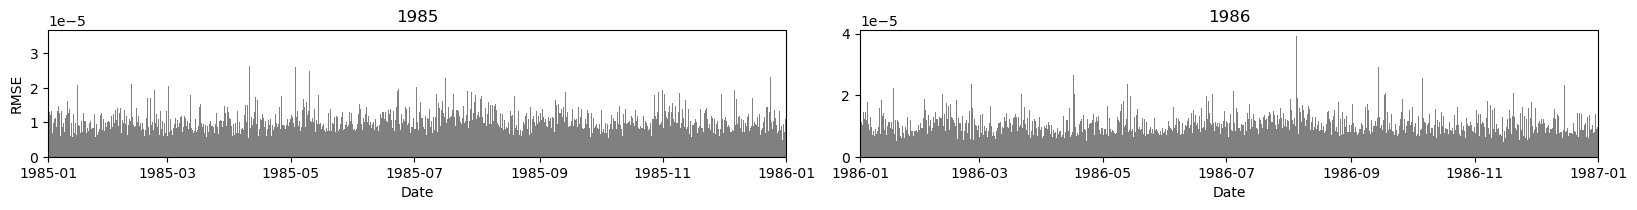

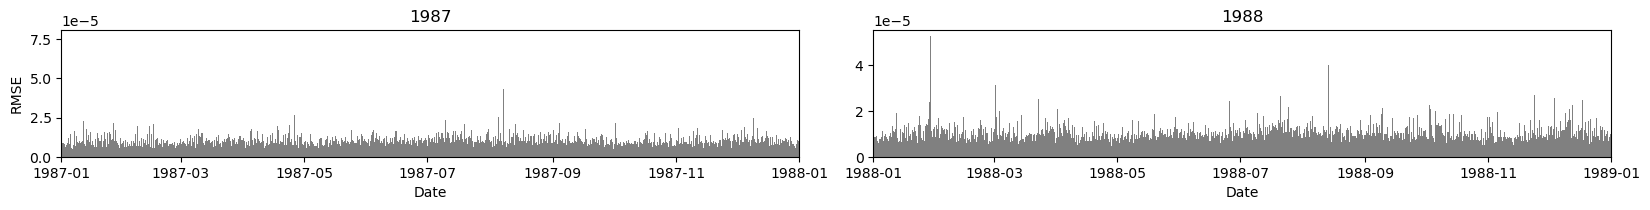

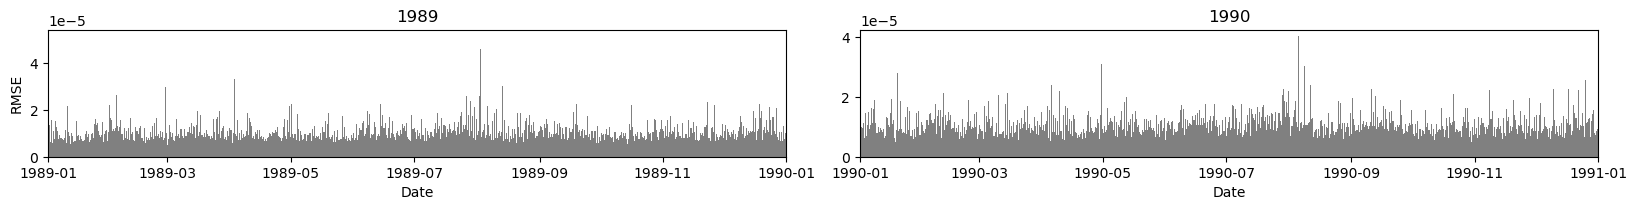

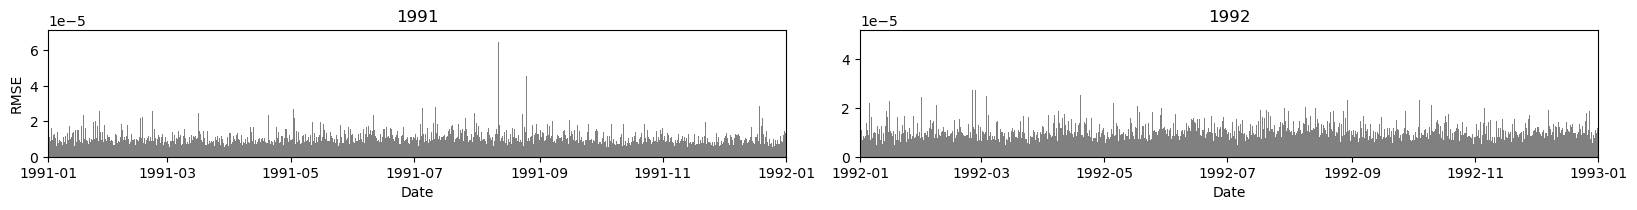

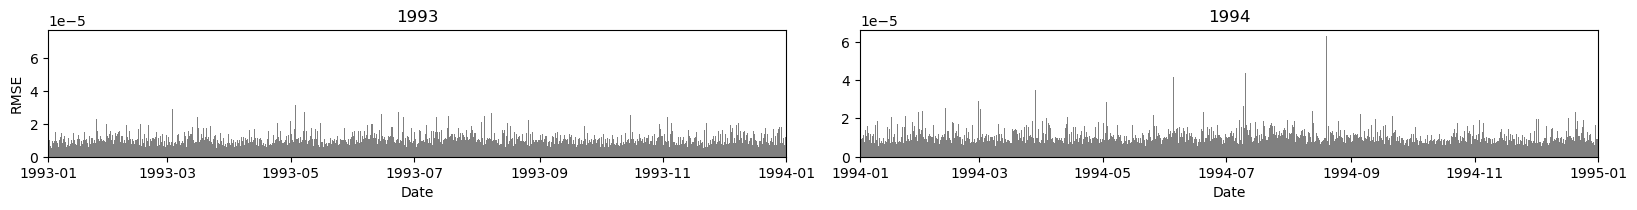

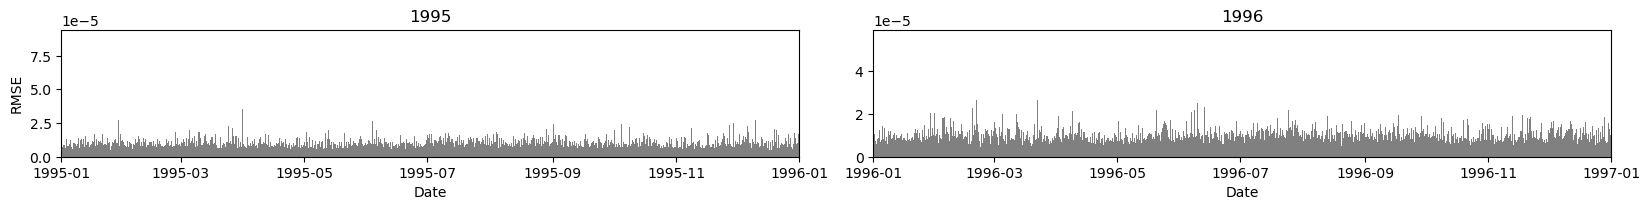

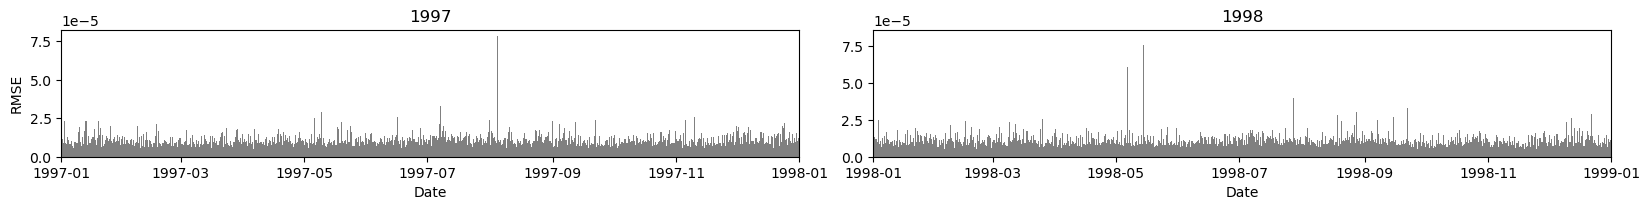

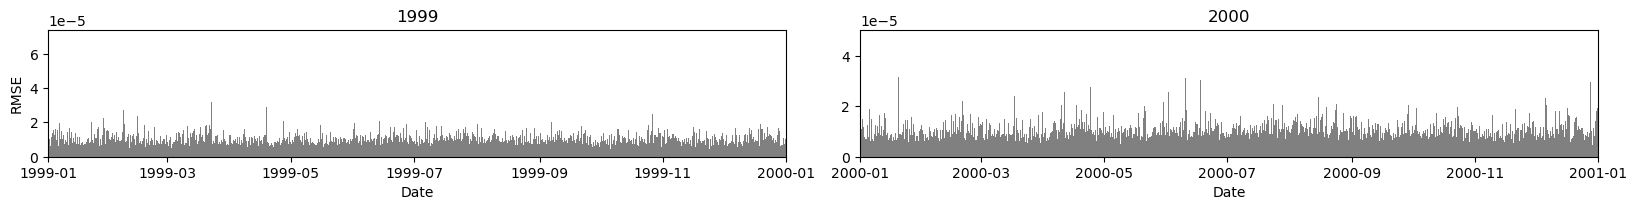

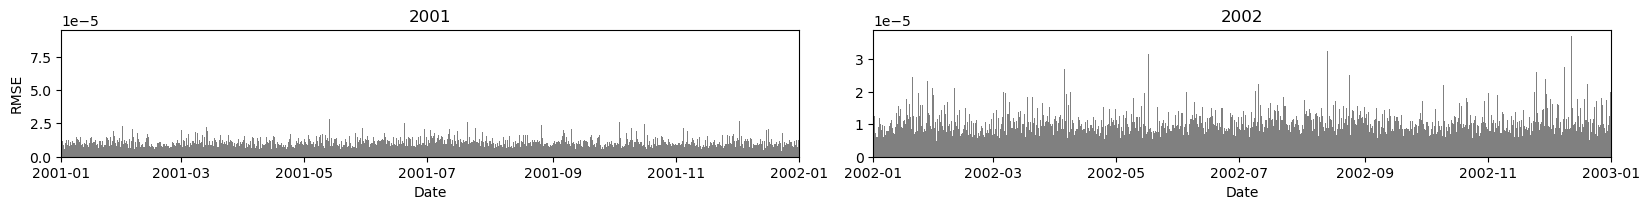

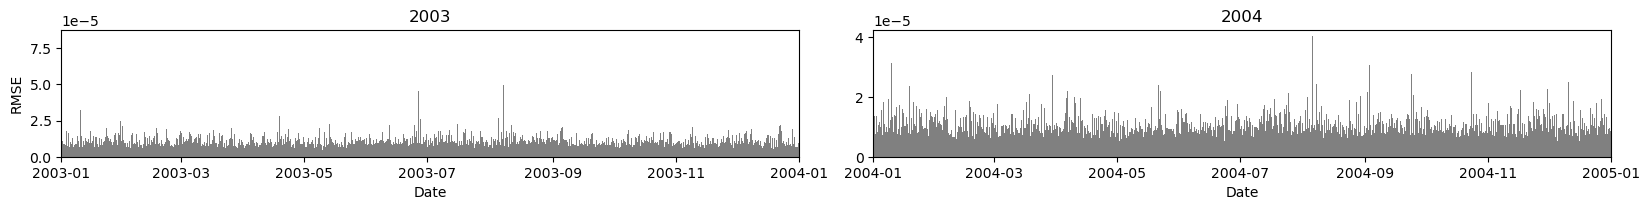

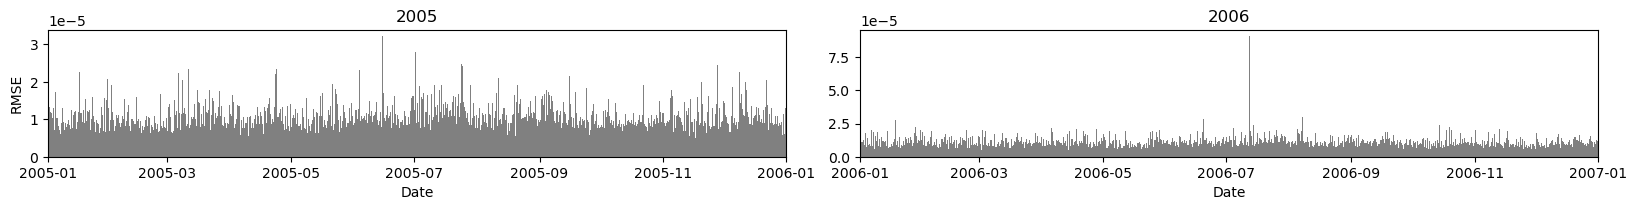

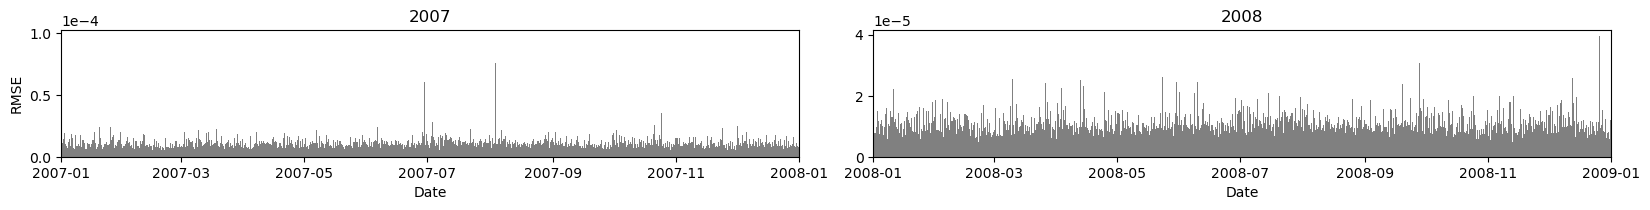

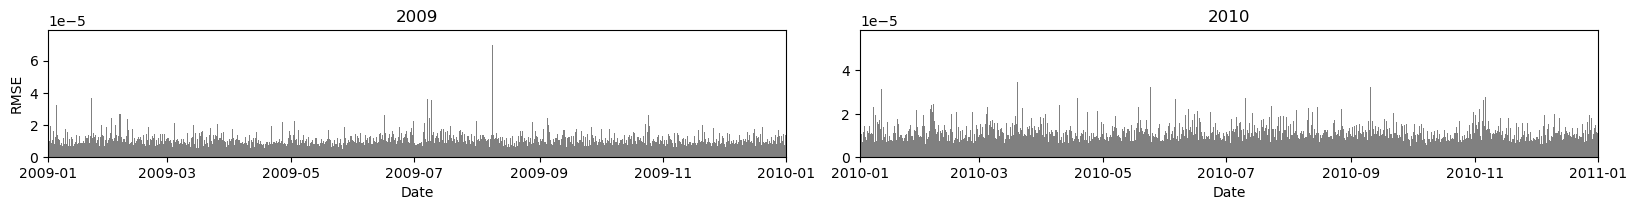

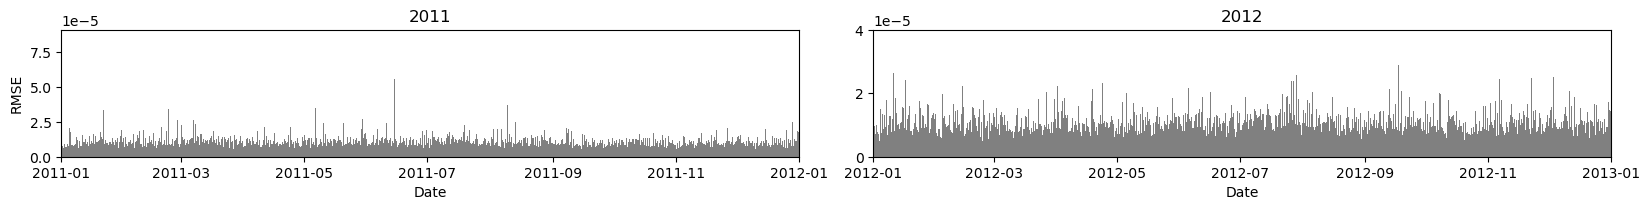

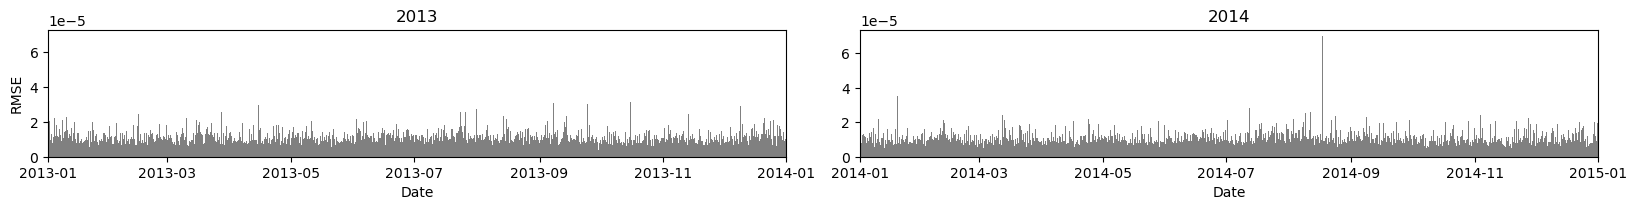

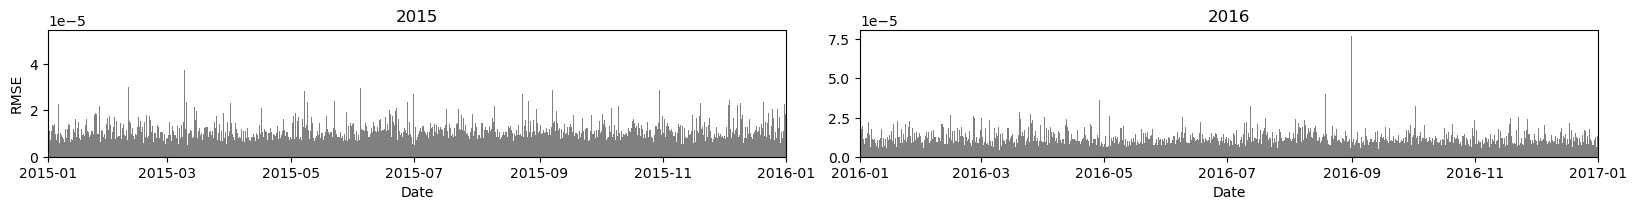

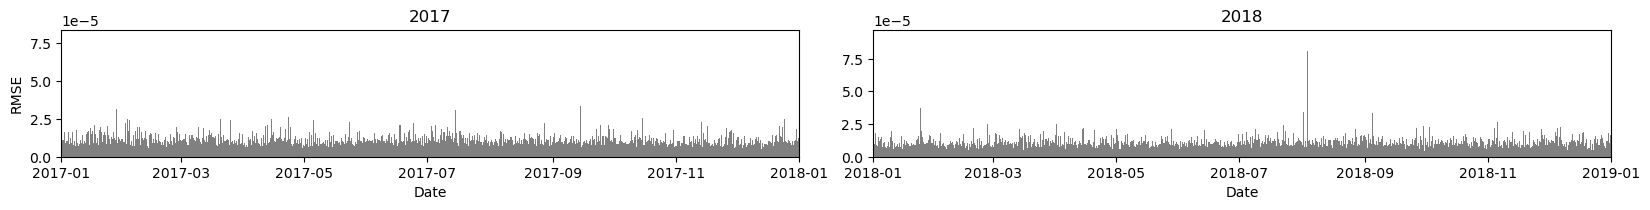

CPU times: user 8min 33s, sys: 1.68 s, total: 8min 34s
Wall time: 8min 34s


In [6]:
%%time
 
for i in  range (0, len(time_list), 2 ):
    display_hourly_rmse_double(time_list[i], rmse_list[i], time_list[i+1], rmse_list[i+1])
 